# Starter Notebook for the recap #

Use this Notebook to get started on the bol.com recap exercise.

In [39]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [40]:

df = pd.read_csv("bol_sales.csv")
df['income_log'] = df['income'].apply(math.log10)
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,income_log
0,person_1,female,7065,4.6,30,105,117,1232,3.849112
1,person_2,female,23028,9.8,23,81,70,1396,4.362256
2,person_3,female,103377,9.2,11,38,94,1240,5.014424
3,person_4,female,9815,3.2,16,54,124,720,3.991890
4,person_5,female,22646,10.1,21,78,119,1379,4.354992


## Exploratory data analysis ##

Do your exploratory data analysis to determine what variables you want to use and how.

In [57]:
# df.info()
df['spent_bol'].max()

1760

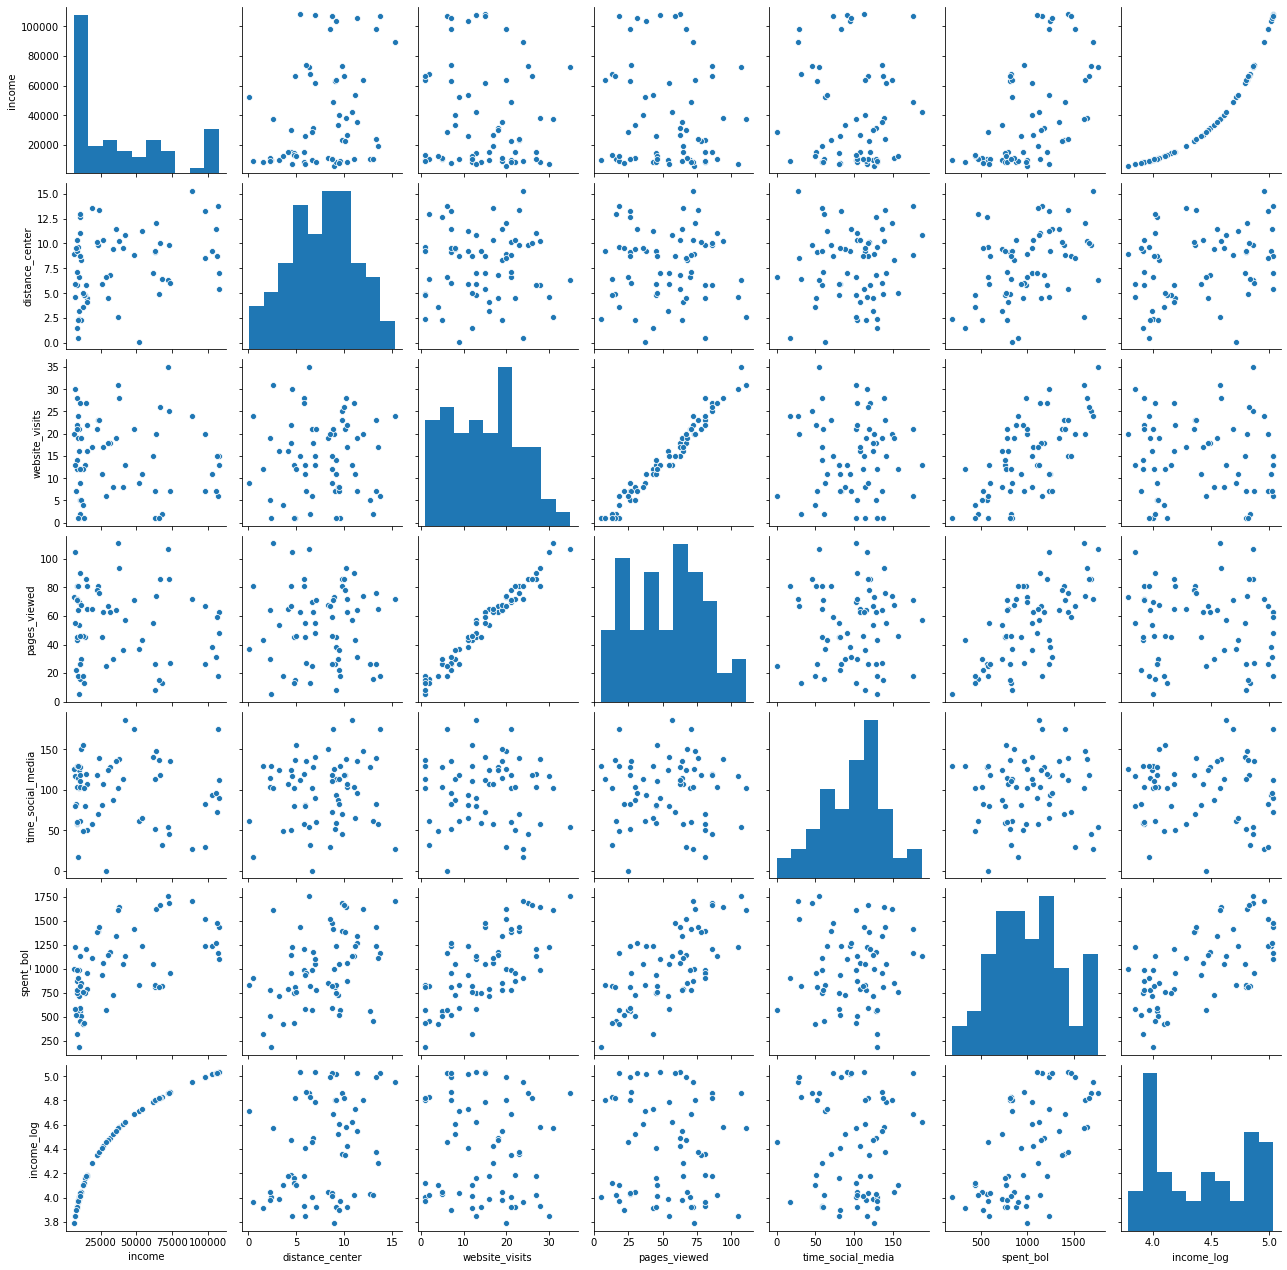

In [41]:
sns.pairplot(df)
plt.show()

I use the variables pages_viewed, website_visits because they look linear. Income log also looks linear. distance_center can be used as well.

## Variable transformations ##

Do your variable transformations here.

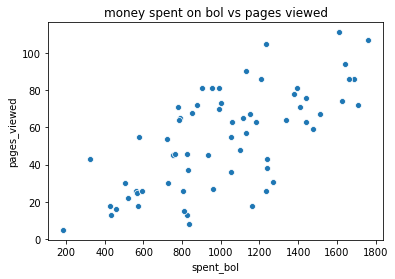

In [42]:
sns.scatterplot(x='spent_bol', y='pages_viewed',  data=df) 
plt.xlabel('spent_bol')
plt.ylabel('pages_viewed')
plt.title('money spent on bol vs pages viewed')
plt.show()

No strange outliers

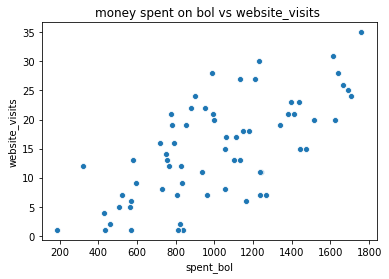

In [43]:
sns.scatterplot(x='spent_bol', y='website_visits',  data=df) 
plt.xlabel('spent_bol')
plt.ylabel('website_visits')
plt.title('money spent on bol vs website_visits ')
plt.show()

Also seems fine

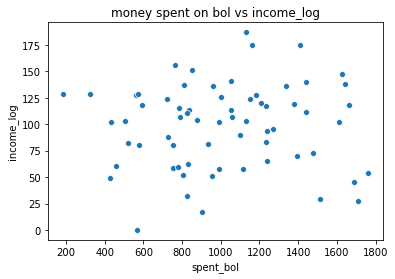

In [72]:
sns.scatterplot(x='spent_bol', y='income_log',  data=df) 
plt.xlabel('spent_bol')
plt.ylabel('income_log')
plt.title('money spent on bol vs income_log')
plt.show()

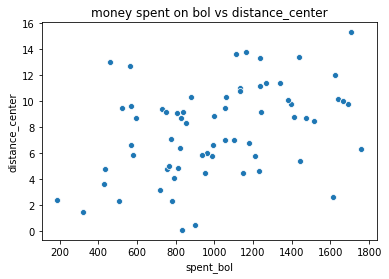

In [88]:

sns.scatterplot(x='spent_bol', y='distance_center',  data=df) 
plt.xlabel('spent_bol')
plt.ylabel('distance_center')
plt.title('money spent on bol vs distance_center')
plt.show()

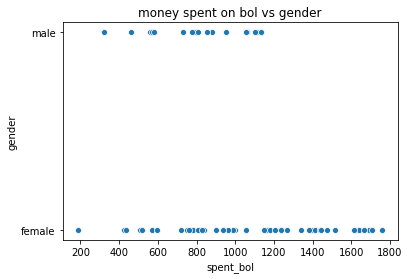

In [95]:

sns.scatterplot(x='spent_bol', y='gender',  data=df) 
plt.xlabel('spent_bol')
plt.ylabel('gender')
plt.title('money spent on bol vs gender')
plt.show()

In [102]:
df['gender'].replace('female', 1, inplace=True)
df['gender'].replace('male', 0, inplace=True)
df['gender']

0     1
1     1
2     1
3     1
4     1
     ..
61    1
62    1
63    0
64    1
65    1
Name: gender, Length: 66, dtype: int64

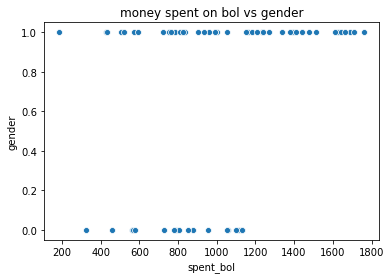

In [103]:

sns.scatterplot(x='spent_bol', y='gender',  data=df) 
plt.xlabel('spent_bol')
plt.ylabel('gender')
plt.title('money spent on bol vs gender')
plt.show()

## Building the model ##

Build your model here. **Call it *lm*.**

In [116]:
y = df['spent_bol'] #We need to take out the rating as our Y-variable
X = df[['website_visits', 'pages_viewed', 'income_log','distance_center', 'gender']] 
X.index = df['id'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

,pages_viewed,income_log,distance_center,gender
id,,,,
person_1,105,3.849112,4.6,1
person_2,81,4.362256,9.8,1
person_3,38,5.014424,9.2,1
person_4,54,3.991890,3.2,1
person_5,78,4.354992,10.1,1


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,pages_viewed,income_log,distance_center,gender
id,,,,
person_11,94,4.580743,10.2,1
person_60,45,4.411973,5.9,1
person_20,63,4.494572,6.8,1
person_35,30,4.523811,9.4,0
person_64,55,3.850646,5.9,0


In [118]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [119]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
10.184512,pages_viewed
500.642301,income_log
29.429593,distance_center
192.101320,gender


each website visit decreases 11 to the money  spent\
each page viewed adds 14 to the money spent.\
each x10 from income log adds 501 to the money spent.
each point closer to the center adds 29\
if female adds 192.


## Evaluating the model ##

Evaluate your model here, on the data that you were given (training data). This code can be ran multiple times with different models, if you want, to determine the best model (but beware of overfitting!).

Use RMSE as your metric.

In [120]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.9965457693398521

The R^2 is 0.99, which means 99% of the variation in money spent  is explained by the model. That's pretty good! Let's calculate the RMSE: the root mean squared error.

In [121]:
math.sqrt(mean_squared_error(y_test, y_test_p))

17.964925199254726

the amount of money spent is typically off 4 euros. 

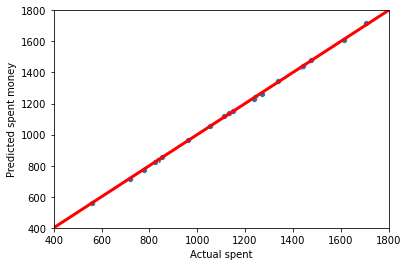

In [110]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual spent')
plt.ylabel('Predicted spent money')
value1 = 400
value2 = 1800
plt.xlim([value1,value2]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([value1,value2])
plt.plot([value1, value2], [value1, value2], color='red', lw=3) #Plot a diagonal length
plt.show()

## Evaluating the model on the hold-out test set ##

This can only be done when the lecturer uploades the hold-out data. Upload this file in the same directory as this Notebook. Uncomment the code and make it work. The RMSE is your entry for the prize! ;-)

In [122]:
df_ho = pd.read_csv('bol_sales_holdout.csv') #reading the hold-out data

# put any variable transformations that you want to do here
df_ho['income_log'] = df_ho['income'].apply(math.log10)
df_ho['gender'].replace('female', 1, inplace=True)
df_ho['gender'].replace('male', 0, inplace=True)


X_ho = df_ho[['website_visits', 'pages_viewed', 'income_log','distance_center', 'gender']] #adapt to select X variables

y_pred_ho = lm.predict(X_ho) #predicting the hold-out data, using your model
math.sqrt(mean_squared_error(df_ho['spent_bol'],y_pred_ho)) #get the RMSE on the hold-out data


22.364126065496112

In [52]:
# Scatterplot Matrix